In [3]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [92]:
#Importing dataset
df=pd.read_csv("E:/netflix_titles_nov_2019.csv")

In [93]:
# datatype in columns
df.dtypes

show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

In [94]:
# It will give Index, Datatype, and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [95]:
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [96]:
# imputing in null values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64


In [97]:
# checking for duplicates
df.duplicated().sum()

0

In [98]:
# identifying the year and month from release column
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [99]:
# % of movie and TV shows in dataset
# fig shows two different type of content is there on netflix dataset
x=df["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")

C:\Users\Yashasvee Shukla\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



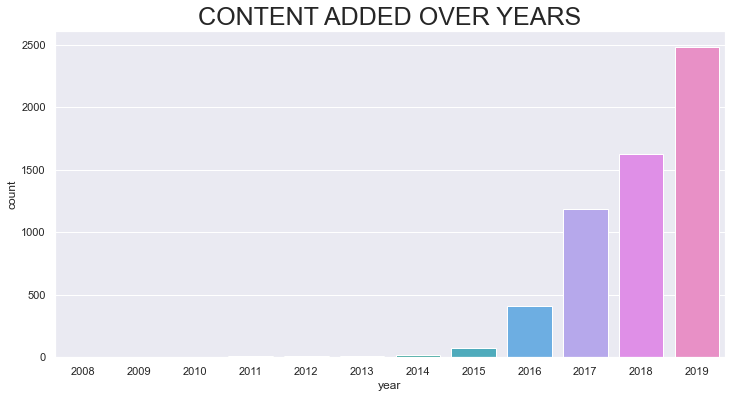

In [70]:
plt.figure(figsize=(12,6))
sns.countplot(df["year"])
plt.title("CONTENT ADDED OVER YEARS",fontsize=25)
plt.show()

C:\Users\Yashasvee Shukla\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



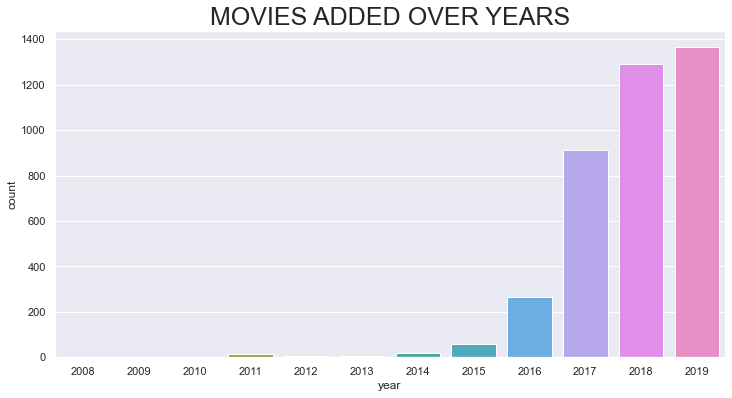

In [71]:
c=df[df["type"]=="Movie"]
plt.figure(figsize=(12,6))
sns.countplot(c["year"])
plt.title("MOVIES ADDED OVER YEARS",fontsize=25)
plt.show()

C:\Users\Yashasvee Shukla\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



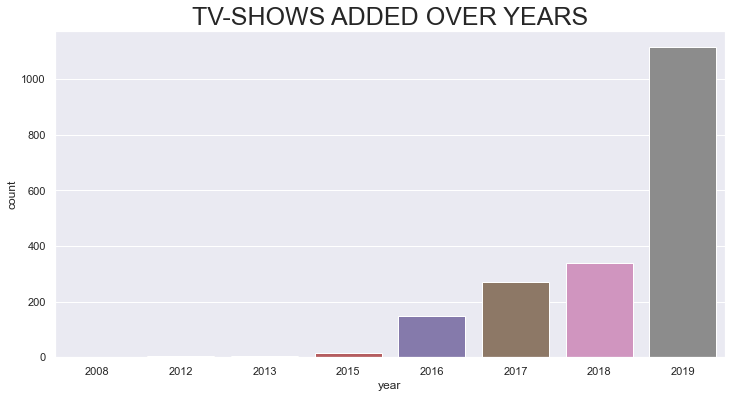

In [72]:
T=df[df["type"]=="TV Show"]
plt.figure(figsize=(12,6))
sns.countplot(T["year"])
plt.title("TV-SHOWS ADDED OVER YEARS",fontsize=25)
plt.show()

## Co-relation between features

Text(0.5, 1.0, 'Heatmap for correlation')

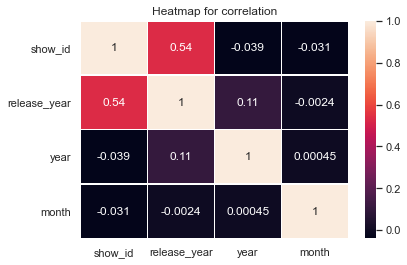

In [73]:
sns.heatmap(df.corr(),annot=True, linewidth=.5)
plt.title("Heatmap for correlation")

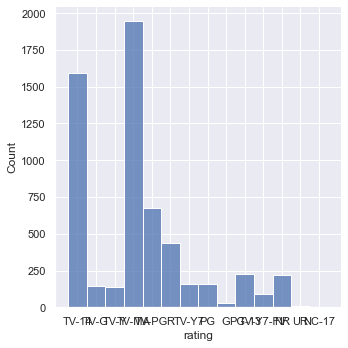

In [100]:

sns.displot(df['rating'])

# Distribution of rating

In [101]:
df.groupby(['rating'])['rating'].count()

rating
G             32
NC-17          2
NR           218
PG           160
PG-13        227
R            439
TV-14       1593
TV-G         147
TV-MA       1947
TV-PG        678
TV-Y         139
TV-Y7        156
TV-Y7-FV      92
UR             7
Name: rating, dtype: int64

In [76]:
px.pie(df,names="ratings_ages",values=df.index)

# Top Genres on Netflix

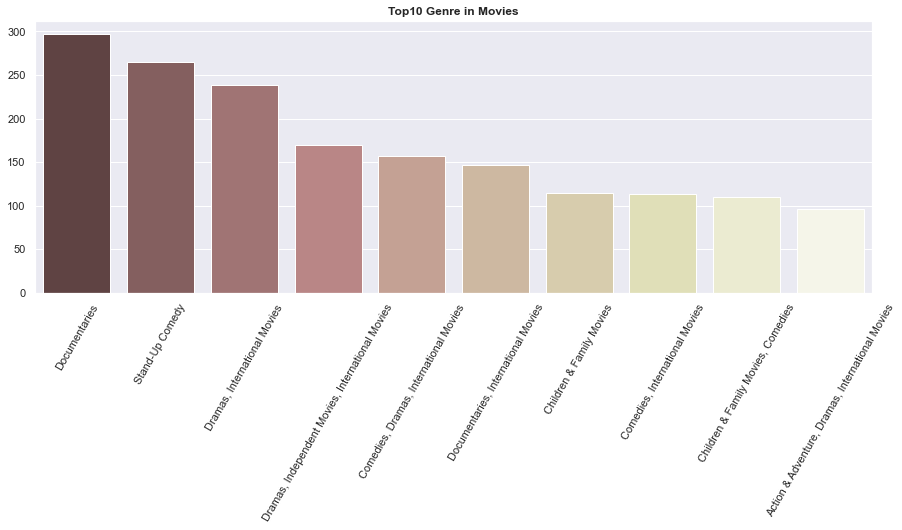

In [77]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()


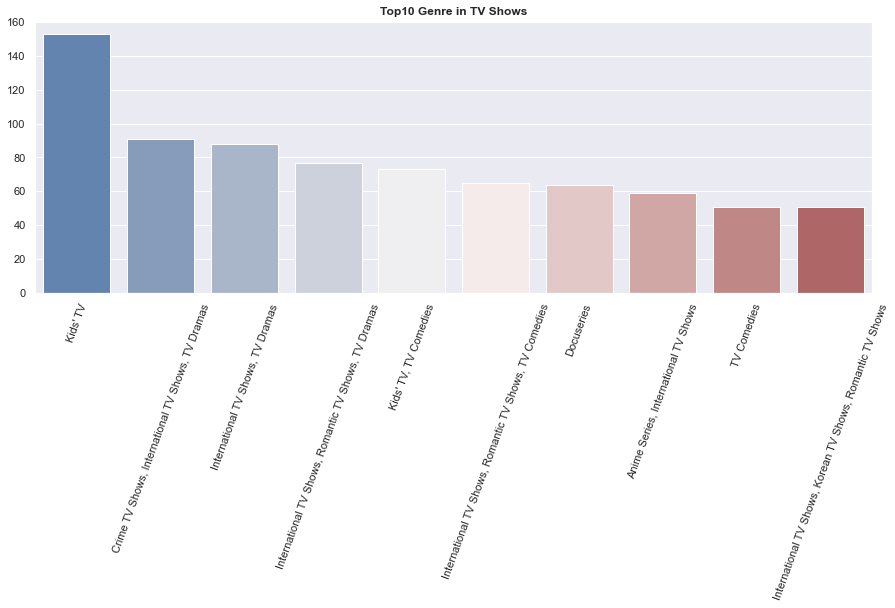

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

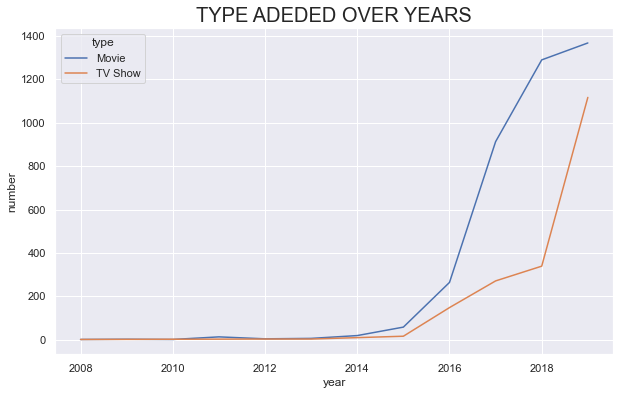

In [79]:
new=df[["type","year"]].value_counts().reset_index()
new.columns=["type","year","number"]
new
plt.figure(figsize=(10,6))
sns.lineplot(data=new,x="year",y="number",hue="type")
plt.title("TYPE ADEDED OVER YEARS",fontsize=20)
plt.show()

In [80]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

# released movie and shows over the years

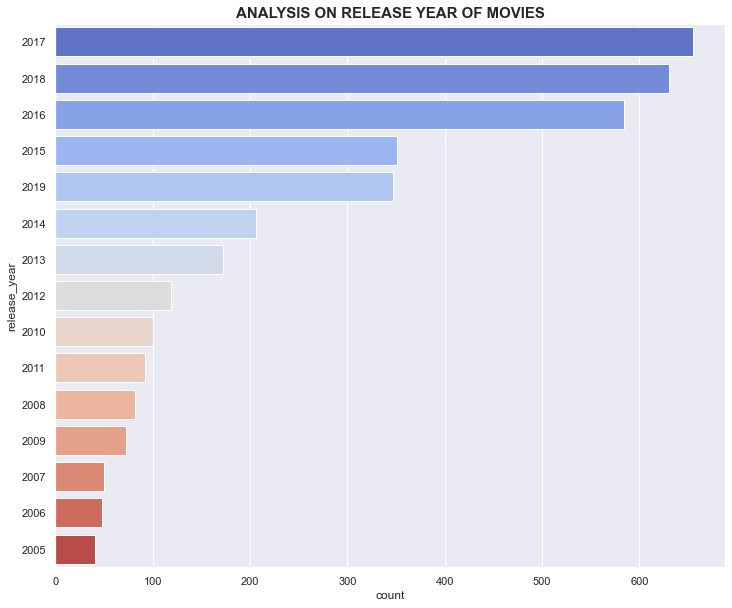

In [81]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

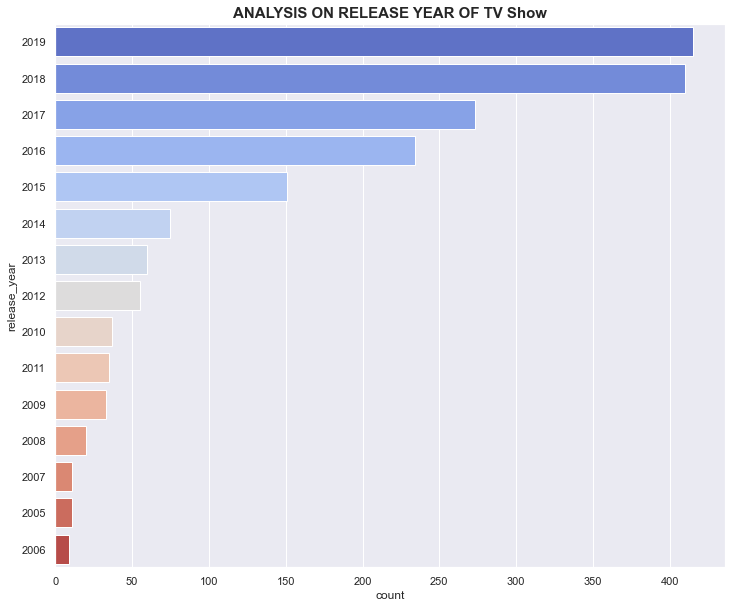

In [82]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

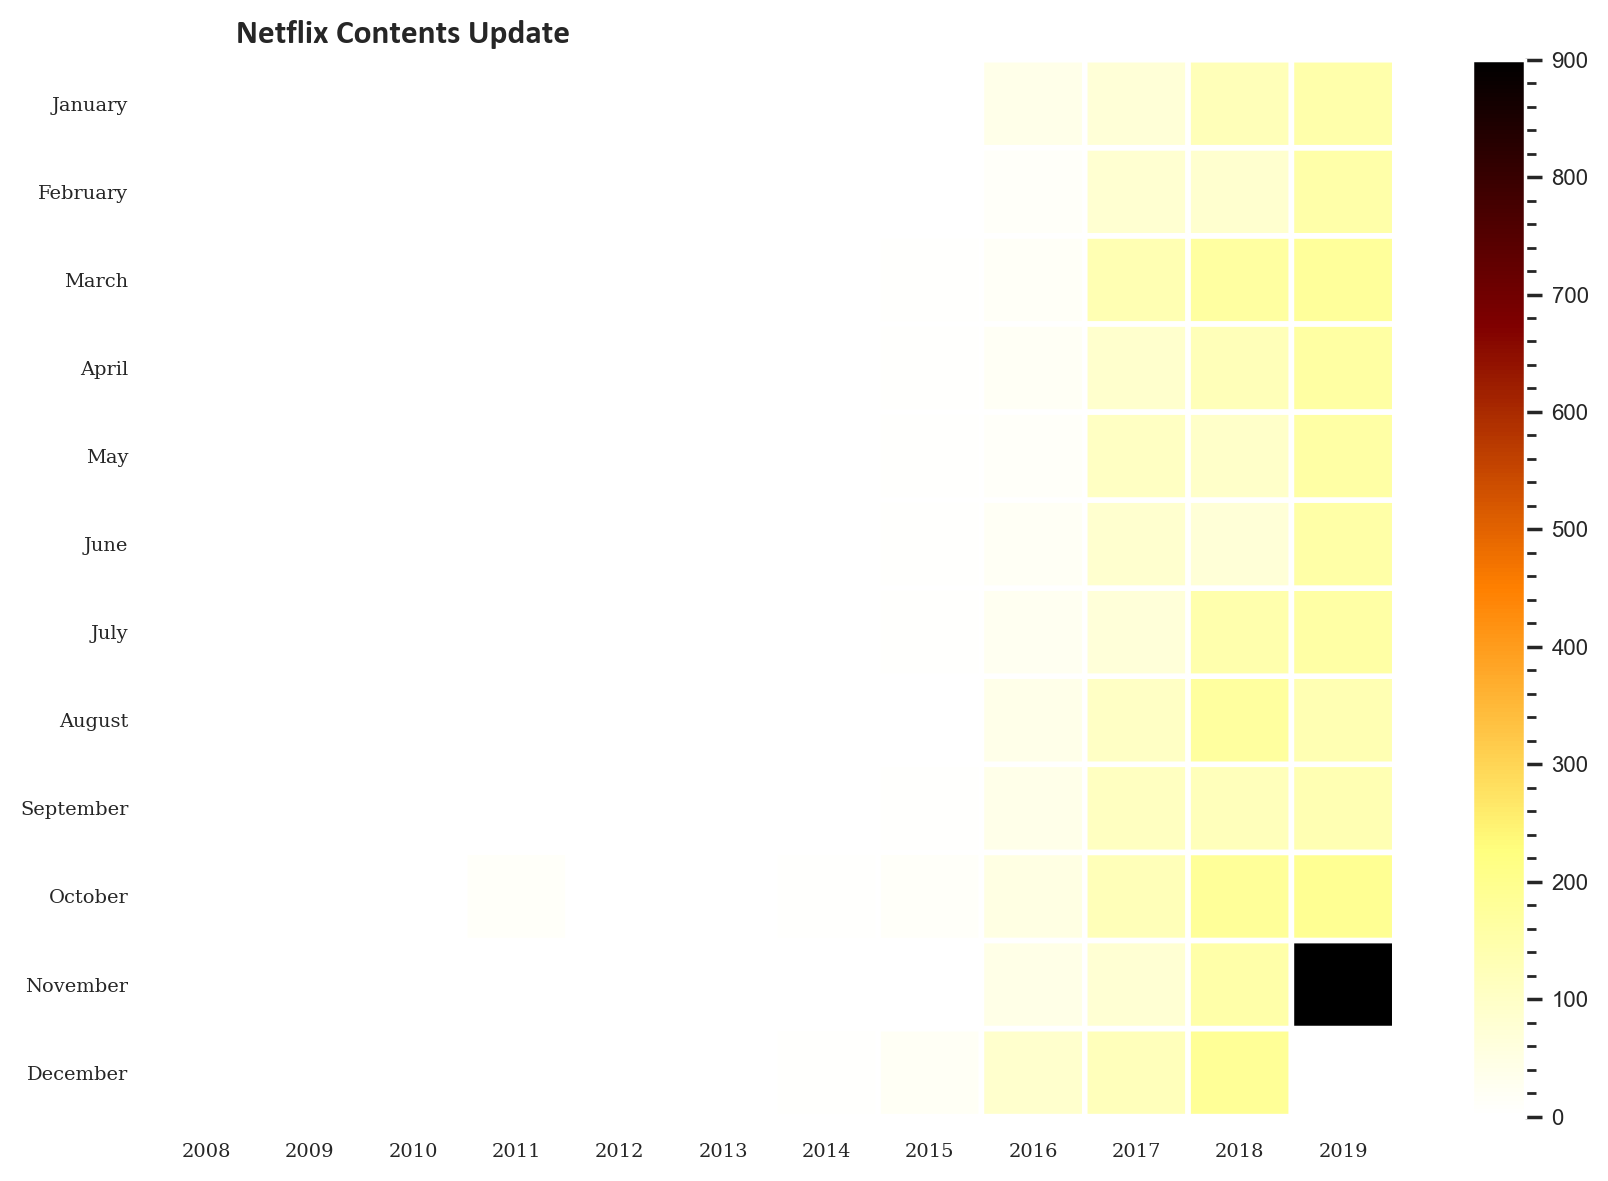

In [83]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = df['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap


plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

### Above cell identifies the releasing content based on the month,
### we can decide to release the content on the month in which less content is being relesed
### If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release.

# which has the highest rating Tv show or Movie

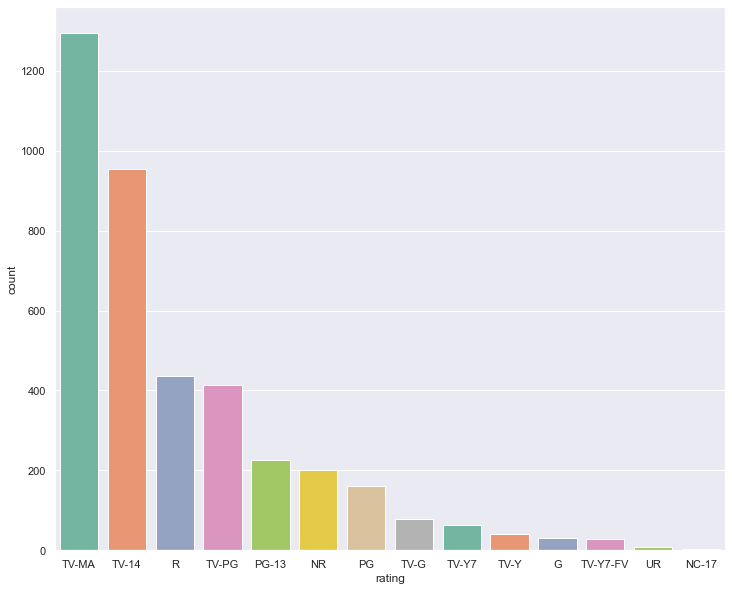

In [84]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df_movies, palette="Set2", order=df_movies['rating'].value_counts().index[0:15])

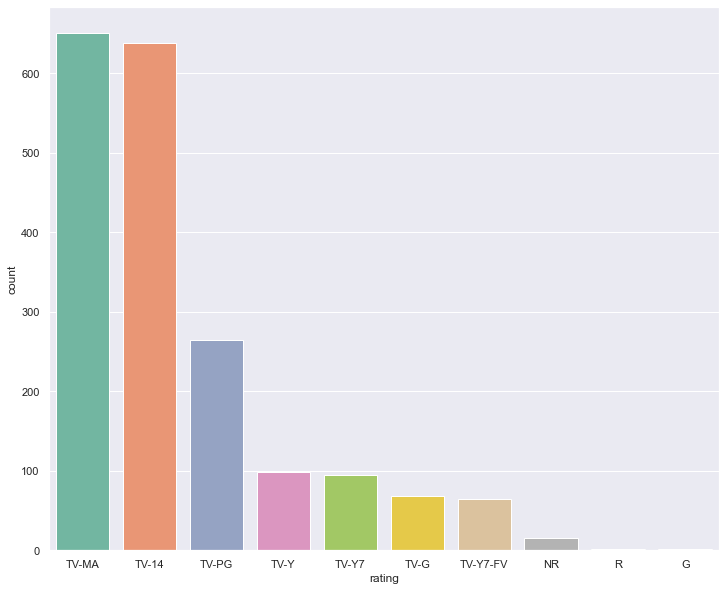

In [85]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df_tv, palette="Set2", order=df_tv['rating'].value_counts().index[0:15])

In [108]:
tv_rating=df_tv.rating.value_counts().sum()
movie_rating=df_movies.rating.value_counts().sum()
print("Total TV Rating",tv_rating)
print("Total Movie Rating",movie_rating)

Total TV Rating 1898
Total Movie Rating 3939


### above cell shows that particular category and total rating sum is more for movies in netflix dataset